# 로지스틱 회귀분석 실습과제 - 와인 데이터
- 와인의 화학 조성을 사용하여 와인의 종류를 예측하기 위한 데이터
- 독립변수(features): Alcohol, Malic acid, Ash, Alcalinity of ash, Magnesium, Total phenols, Flavanoids, Nonflavanoid phenols, Proanthocyanins, Color intensity, Hue, OD280/OD315 of diluted wines, Proline
- 종속변수(target): 와인의 종류 0, 1, 2의 세가지 값

https://datascienceschool.net/03%20machine%20learning/09.01%20%EB%B6%84%EB%A5%98%EC%9A%A9%20%EC%98%88%EC%A0%9C%20%EB%8D%B0%EC%9D%B4%ED%84%B0.html#

In [1]:
# 필요한 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 데이터 읽어오기 및 준비
- sklearn.datasets에서 와인 데이터(load_wine)를 읽어온다.
- 데이터에 대한 설명을 출력해서 확인한다.

In [2]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

- data, target에 각각 독립변수와 종속변수를 저장한다.
- feature_names에 독립변수의 이름을 저장한다.
- data, target의 shape와 feature_names를 출력한다.
- data의 첫 5건의 값을 출력한다.
- target의 첫 5건의 값을 출력한다.

In [3]:
data  = wine.data
target = wine.target
# pandas를 사용하고 싶은 경우 아래 코드를 이용
#df = pd.DataFrame(wine.data, columns=wine.feature_names)
#df["target"] = wine.target
feature_names = wine.feature_names
print(data.shape, target.shape)
print(feature_names)
print(data[:5]) 
print(target[:5])

(178, 13) (178,)
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]
[0 0 0 0 0]


### 2. 데이터 살펴보기
- data set에서 X에 해당하는 각각의 값과 y의 값으로 그래프를 그려서 각 x값과 y의 관계를 직관적으로 살펴본다.
- subplot은 3 x 5 행렬로 그리고 figsize는 (20, 10)로 지정한다.
- set_title로 feature_names를 출력해서 각 그래프의 독립변수를 알 수 있도록 한다.
- scatter는 alpha를 0.3으로 지정한다.

**출력 예시**

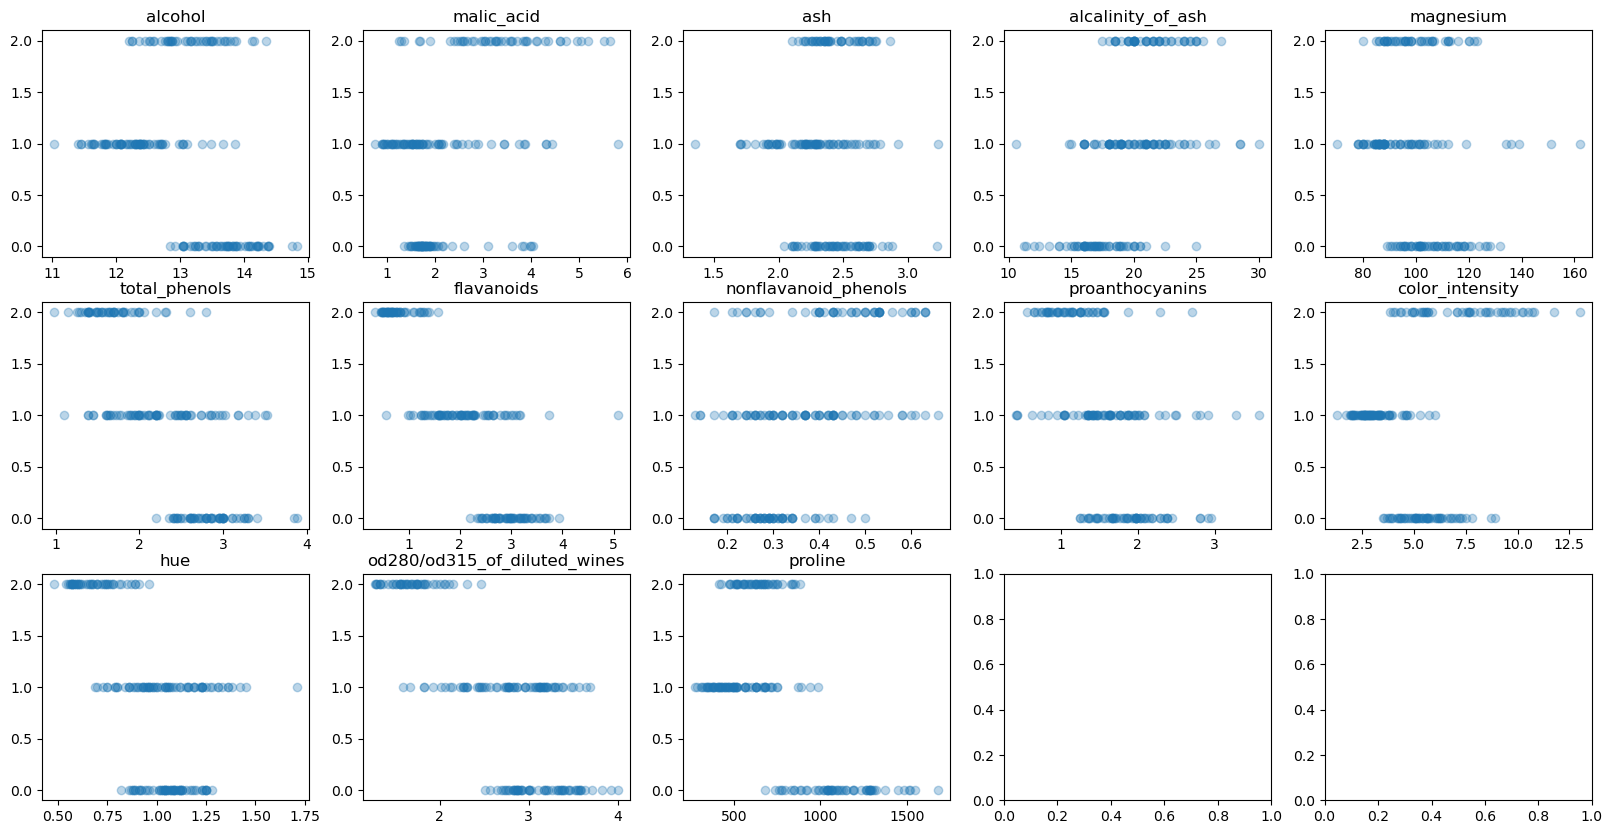

- 위 그래프에서 scatter를 seaborn의 kdeplot으로 바꾸어 그린다.

**출력 예시**

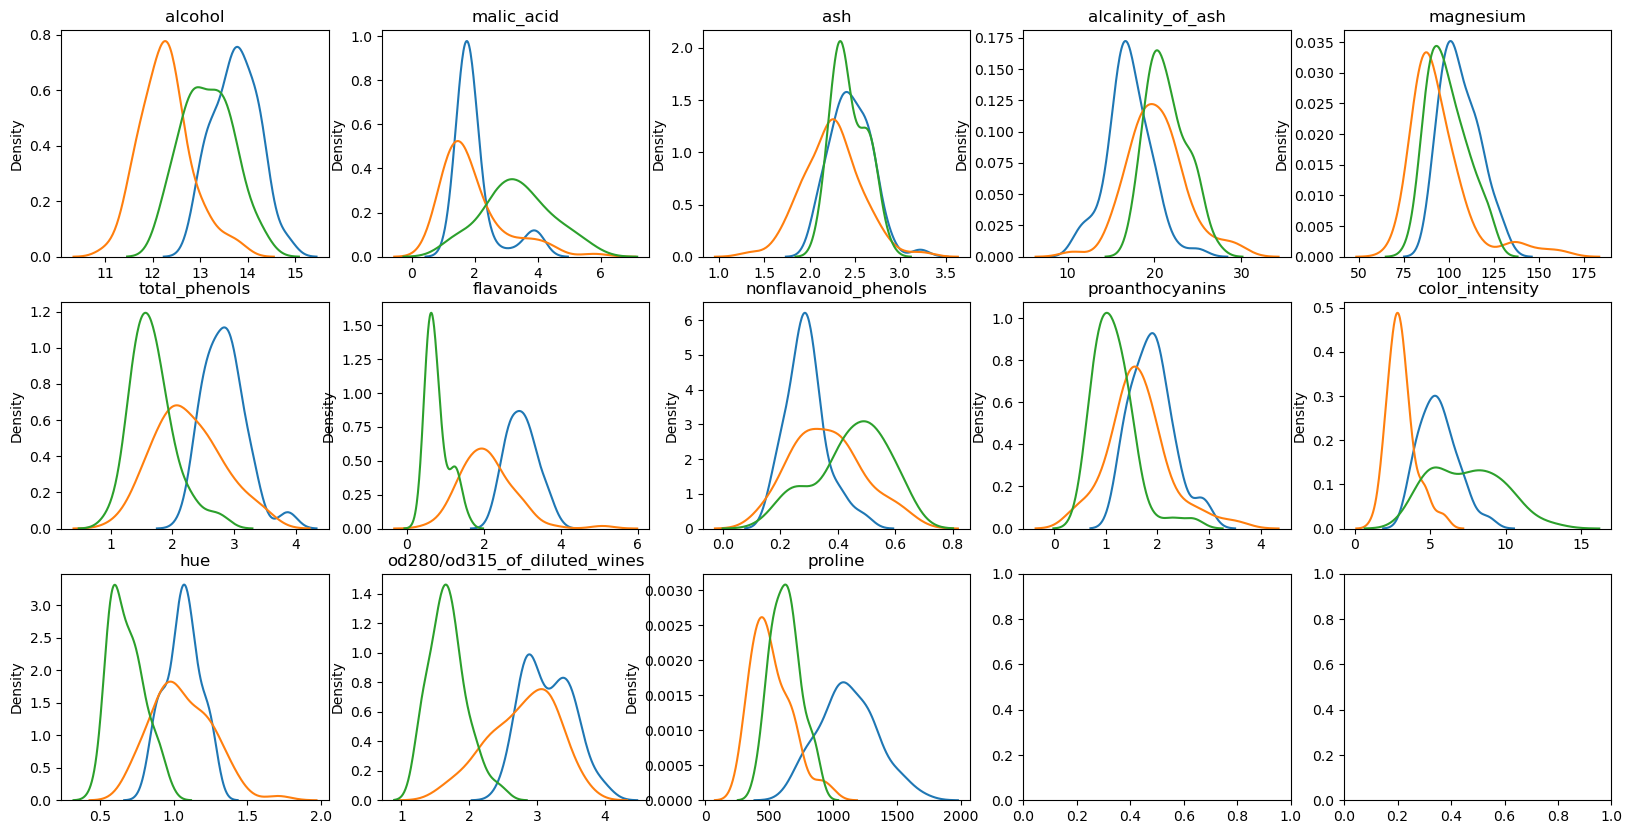

- alcohol과 total_phenols의 두 차원으로 target class에 대해 scatter 그래프를 그린다.
- 이 때 세 개의 target class가 다른 색깔의 점으로 구분될 수 있도록 한다.
- 그래프를 보고 분류 성능이 잘 나올 수 있을 지 짐작해본다.

**출력 예시**

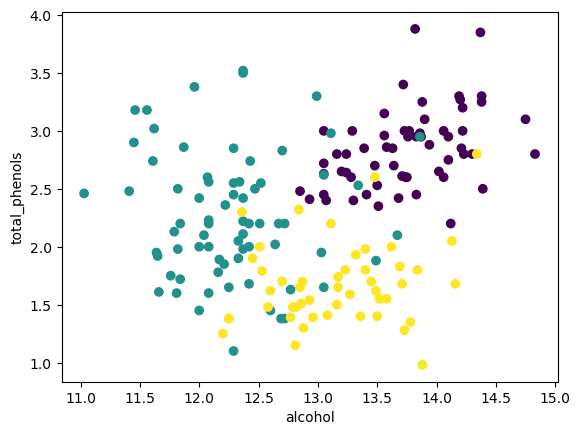

- flavanoids와 color_intensity의 두 차원으로 target class에 대해 scatter 그래프를 그린다.
- 이 때 세 개의 target class가 다른 색깔의 점으로 구분될 수 있도록 한다.
- 그래프를 보고 분류 성능이 잘 나올 수 있을 지 짐작해본다.

**출력 예시**

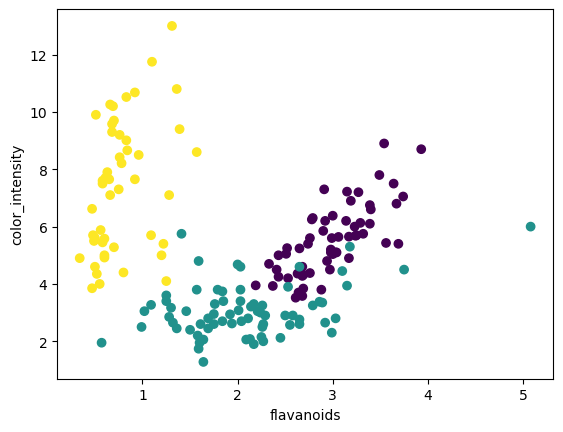


### 3. 데이터셋 분리
- train_test_split을 이용하여 train set과 test set으로 분리한다.
- X_train, X_test, Y_train, Y_test으로 이름을 지정한다.
- test_size의 비율은 0.2, random_state는 2024를 설정한다.
- 분리된 data set(X_train, X_test, Y_train, Y_test)의 크기를 출력한다.

**출력 예시**
```
(142, 13) (142,)
(36, 13) (36,)
```

### 3. 로지스틱 회귀분석 실시
- max_iter를 10000으로 설정하고 로지스틱 회귀분석 모형을 학습한다.
- train set과 test set에 대해 accuracy를 출력한다.

**출력 예시**
```
Train set score: 0.993
Test set score: 0.972
```

- X_test에 대해 예측을 수행하고 예측 결과(predicted) 중 앞 20개를 원래 값(y_test)와 비교하여 출력한다.

**출력 예시**
```
predicted: [2 0 2 0 0 1 1 1 2 1 1 1 1 0 1 1 0 2 0 2]
truth    : [2 0 2 0 0 1 2 1 2 1 1 1 1 0 1 1 0 2 0 2]
```

### 4. 계수, 상수, decision_function, predict_proba 출력
- 모형의 계수(coeff_)와 상수(intercept_)를 출력한다.

**출력 예시**
```
coef_ [[ 6.233e-01  4.345e-01  6.965e-01 -2.142e-01 -1.591e-02  2.506e-01
   7.758e-01  1.197e-01 -2.901e-02  1.765e-01 -2.555e-02  4.810e-01
   8.433e-03]
 [-6.799e-01 -8.144e-01 -7.503e-01  1.273e-01 -2.285e-02  3.068e-01
   1.705e-01  2.800e-02  5.265e-01 -8.989e-01  3.089e-01  2.178e-01
  -8.789e-03]
 [ 5.668e-02  3.799e-01  5.381e-02  8.686e-02  3.876e-02 -5.575e-01
  -9.464e-01 -1.477e-01 -4.975e-01  7.223e-01 -2.833e-01 -6.988e-01
   3.561e-04]]
intercept_ [-15.079  20.687  -5.608]
```

- X_test의 앞 10개 값에 대해 decision_function() 값을 출력한다.

**출력 예시**
```
[[-0.102 -5.034  5.136]
 [ 6.698 -4.014 -2.684]
 [-3.001  0.759  2.242]
 [ 4.433 -3.649 -0.784]
 [ 3.096 -0.968 -2.127]
 [-1.458  2.137 -0.679]
 [-2.139  1.105  1.034]
 [-3.457  5.119 -1.662]
 [-0.634 -1.527  2.161]
 [-1.392  1.184  0.208]]
```

- X_test의 앞 10개 값에 대해 predict_proba() 값을 출력한다.

**출력 예시**
```
[[0.005 0.    0.995]
 [1.    0.    0.   ]
 [0.004 0.184 0.812]
 [0.994 0.    0.005]
 [0.978 0.017 0.005]
 [0.025 0.92  0.055]
 [0.02  0.508 0.473]
 [0.    0.999 0.001]
 [0.056 0.023 0.921]
 [0.052 0.688 0.259]]
```